In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(
    "/Users/vytran/Documents/AI/AIO2025/aio.warmup/code/data/used_cars.csv"
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [17]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [18]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [ ]:
x = df["model_year"]
y = df["price"]

print(type(x[0]))

<class 'numpy.int64'>


In [21]:
print(type(y[0]))
print(y[0])

<class 'str'>
$10,300


In [ ]:
# Check for NaN values in 'x'
nan_x = x.isnull().sum()
print(f"Number of NaN values in x: {nan_x}")

Number of NaN values in x: 0


In [ ]:
# Check for NaN values in 'y'
nan_y = y.isnull().sum()
print(f"Number of NaN values in y: {nan_y}")

Number of NaN values in y: 0


In [ ]:
for i in range(len(y)):
    y[i] = int(y[i][1:].replace(",", "").replace("$", ""))

/var/folders/ms/vbczhg656qjfkygpp8ffnxzm0000gn/T/ipykernel_33243/1202249810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(y[i][1:].replace(',', '').replace('$',''))
/var/folders/ms/vbczhg656qjfkygpp8ffnxzm0000gn/T/ipykernel_33243/1202249810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(y[i][1:].replace(',', '').replace('$',''))
/var/folders/ms/vbczhg656qjfkygpp8ffnxzm0000gn/T/ipykernel_33243/1202249810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [29]:
print(y[0])
print(type(y[0]))

10300
<class 'int'>


In [30]:
y.head()

0    10300
1    38005
2    54598
3    15500
4    34999
Name: price, dtype: object

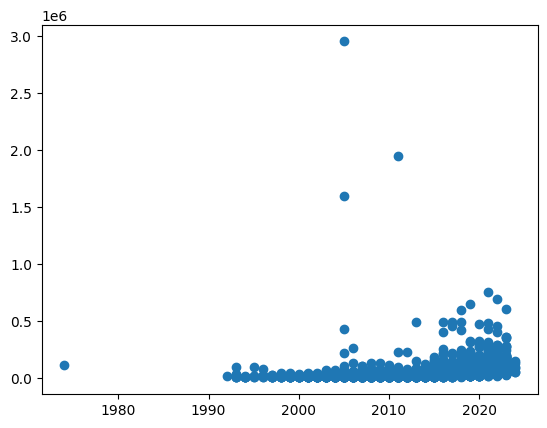

In [31]:
plt.scatter(x, y)

In [ ]:
# Normalize

# Compute mean and std
x_mean = np.mean(x)
y_mean = np.mean(y)
x_deno = max(x) - min(x)
y_deno = max(y) - min(y)

x_normalized = (x - x_mean) / x_deno
y_normalized = (y - y_mean) / y_deno

In [65]:
# Dataset Split

TRAIN_RATIO = 0.8
TEST_RATIO = 0.2

x_train = x[: int(TRAIN_RATIO * len(x))]
y_train = y[: int(TRAIN_RATIO * len(y))]
x_test = x[int(TRAIN_RATIO* len(x)) :]
y_test = y[int(TRAIN_RATIO* len(y)) :]

In [66]:
x_train = x_normalized[: int(TRAIN_RATIO * len(x_normalized))]
y_train = y_normalized[: int(TRAIN_RATIO * len(y_normalized))]
x_test = x_normalized[int(TRAIN_RATIO * len(x_normalized)) :]
y_test = y_normalized[int(TRAIN_RATIO * len(y_normalized)) :]

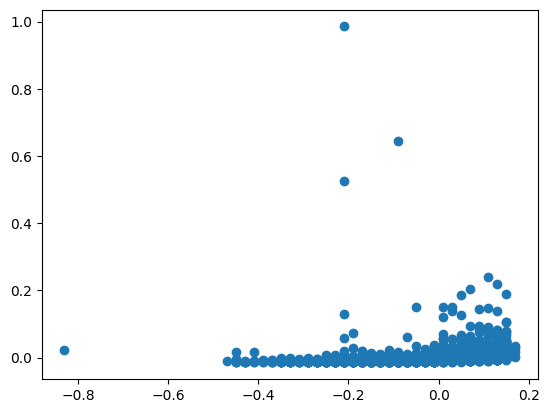

In [67]:
train_example = list(zip(x_train, y_train))
plt.scatter(x_train, y_train)

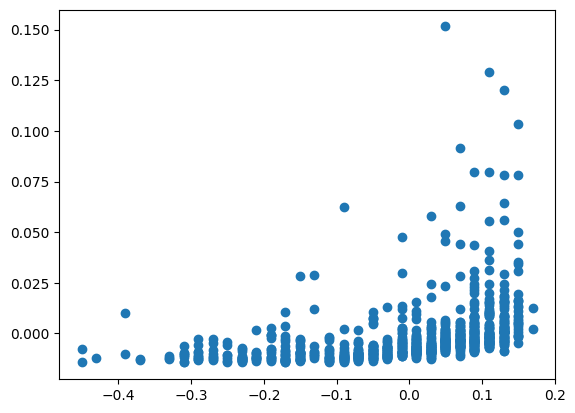

In [68]:
test_example = list(zip(x_test, y_test))
plt.scatter(x_test, y_test)

In [72]:
# Simple Linear Regression
def phi(x):
    return np.array([x, 1])  # Feature vector [x, 1]

def initialWeightVector():
    return np.zeros(2)  # w = [0, 0]

def trainloss(w):
    return (1.0 / len(train_example)) * sum((w.dot(phi(x_i)) - y_i)**2 for x_i, y_i in train_example)

def gradientTrainloss(w):
    return (1.0 / len(train_example)) * sum(2 * (w.dot(phi(x_i)) - y_i) * phi(x_i) for x_i, y_i in train_example)

def gradientDescent(L, gradientL, initialWeightVector, eta=0.01, max_iters=2000, step=2):
    w = initialWeightVector()
    history = []  # Store loss for plotting
    for i in range(max_iters):
        value = L(w)
        gradient = gradientL(w)
        w_new = w - eta * gradient
        history.append(value)
        # Print every 200 iterations
        if i % step == 0:
            grad_norm = np.linalg.norm(gradient)
            print(f"Epoch {i}: Weight Vector = {w}, TrainLoss = {value:.6f}, Gradient Norm = {grad_norm:.6f}")
        w = w_new
    return w, history

In [73]:
w, loss_history = gradientDescent(trainloss, gradientTrainloss, initialWeightVector, eta=0.01, max_iters=800, step=50)

Epoch 0: Weight Vector = [0. 0.], TrainLoss = 0.000824, Gradient Norm = 0.001398
Epoch 50: Weight Vector = [0.00061923 0.00020034], TrainLoss = 0.000823, Gradient Norm = 0.001250
Epoch 100: Weight Vector = [0.00122918 0.00027294], TrainLoss = 0.000823, Gradient Norm = 0.001213
Epoch 150: Weight Vector = [0.00183007 0.00029903], TrainLoss = 0.000822, Gradient Norm = 0.001193
Epoch 200: Weight Vector = [0.00242205 0.00030818], TrainLoss = 0.000821, Gradient Norm = 0.001175
Epoch 250: Weight Vector = [0.00300526 0.00031117], TrainLoss = 0.000821, Gradient Norm = 0.001158
Epoch 300: Weight Vector = [0.00357984 0.00031192], TrainLoss = 0.000820, Gradient Norm = 0.001140
Epoch 350: Weight Vector = [0.00414592 0.00031186], TrainLoss = 0.000819, Gradient Norm = 0.001124
Epoch 400: Weight Vector = [0.00470363 0.00031151], TrainLoss = 0.000819, Gradient Norm = 0.001107
Epoch 450: Weight Vector = [0.00525308 0.00031106], TrainLoss = 0.000818, Gradient Norm = 0.001091
Epoch 500: Weight Vector = [0

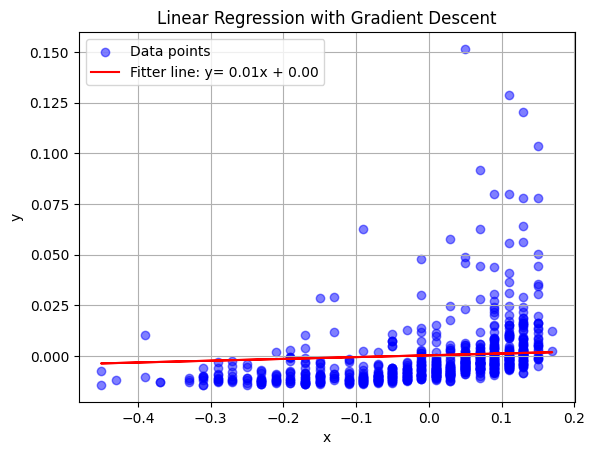

In [74]:
plt.scatter(x_test,y_test, color='blue', label='Data points', alpha = 0.5)
y_predict = w[0] * x_test + w[1]
plt.plot(x_test, y_predict, color='red', label=f'Fitter line: y= {w[0]:.2f}x + {w[1]:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# Predict

car_model_year = 2018
car_model_year_norm = (car_model_year - x_mean)/ x_deno
price = w[0] * car_model_year_norm + w[1]
price_denormalized = price * y_deno + y_mean
print(f"Predicted price for a car with model year {car_model_year}: ${price_denormalized:.2f}")


Predicted price for a car with model year 2018: $46763.87


In [58]:
df[["model_year", "price"]][df["model_year"]==2018]

,model_year,price
19,2018,68750
30,2018,48000
36,2018,33598
60,2018,42000
61,2018,144900
...,...,...
3968,2018,34995
3986,2018,61000
3990,2018,38000
3997,2018,17899


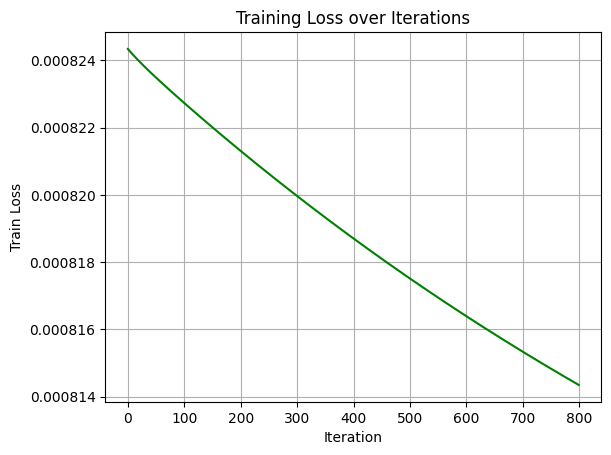

In [79]:
# Plot loss over iterations
plt.plot(loss_history, color='green')
plt.xlabel('Iteration')
plt.ylabel('Train Loss')
plt.title('Training Loss over Iterations')
plt.grid(True)
plt.show()